In [2]:
# Executing this cell does some magic
%load_ext autoreload
%autoreload 2
from earlySN import dataset

Configuration file not found:

    /Users/christineye/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


In [3]:
from earlySN import lightcurve

In [14]:
test = dataset.Dataset(base_path = "/Users/christineye/earlySN/earlySN", default = "yao", bands = ['r', 'g'])

In [ ]:
test.fit_salt(save_path = './demo/', verbose = False)

In [16]:
test.salt_stats()
test.spectral_filter()
test.pv_correction()
test.param_cuts()

x0: 0.001 $\pm$ 0.002
x1: -0.009 $\pm$ 1.263
c: 0.021 $\pm$ 0.121
ZTF18aansqun c
ZTF18aaqcqkv z
ZTF18aarldnh z
ZTF18aarqnje z
ZTF18aauocnw z
ZTF18aaxakhh z
ZTF18aaxqyki z
ZTF18aaxrvzj z
ZTF18abatffv z
ZTF18abclalx z
ZTF18abealop c
ZTF18abfwuwn z
ZTF18abgmcmv c
ZTF18abgxvra z
ZTF18abixjey z
ZTF18abjdjge z
ZTF18abjtger z
ZTF18abkhdxe z
ZTF18abklljv z
ZTF18aboaeqy z
ZTF18abptsco z
ZTF18abqbavl z
ZTF18abrzrnb z
ZTF18abslxhz z
ZTF18abssdpi z
ZTF18abtcdfv z
ZTF18abukmty z
ZTF18abvbayb z
ZTF18abwdcdv c
ZTF18abwtops z


Outliers:  [39]
Repeating Tripp fit without outliers
Fitting Hubble residuals
Tripp parameters: $lpha$= 0.10788668704578791 $\pm$ 0.014769027617377785 $\pm$, eta$= 2.7800149225248916 $\pm$ 6.179679155238995e-06 $\pm$, $\gamma$= 0.03852372490401771 $\pm$ 0.028332440418460406 $\pm$, M_0= -19.249103093884173 $\pm$ 0.048491559418132144 $\pm$, M_1= -19.16228489629692 $\pm$ 0.029300575270196753 $\pm$, M_2= -19.177242385075218 $\pm$ 0.02376228289502766 $\pm$, $\sigma_i$= 0.15074105858242257 $\pm$ 0.010633897588002194 $\pm$, 


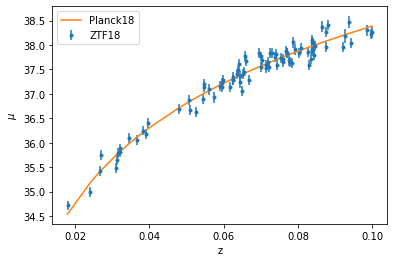

In [17]:
test.fit_hubble(save_path = './demo/', verbose = True)

In [11]:
test.load_from_saved('./demo/')

Loaded Hubble diagram parameters
Loaded excess search results
Loaded lightcurve fit parameters


Searching for excess in 89 supernovae


/Users/christineye/earlySN/earlySN/lightcurve.py:680: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax[i,1].errorbar(binned[band][:,0], (binned[band][:,1] - binned_y[band][j])/binned[band][:,2],
/Users/christineye/earlySN/earlySN/lightcurve.py:745: RuntimeWarning: invalid value encountered in sqrt
  var = np.sqrt(np.diagonal(cov))
/Users/christineye/earlySN/earlySN/lightcurve.py:180: RuntimeWarning: invalid value encountered in sqrt
  var = np.sqrt(np.diagonal(cov))
/Users/christineye/earlySN/earlySN/lightcurve.py:726: RuntimeWarning: invalid value encountered in sqrt
  var = np.sqrt(np.diagonal(cov))


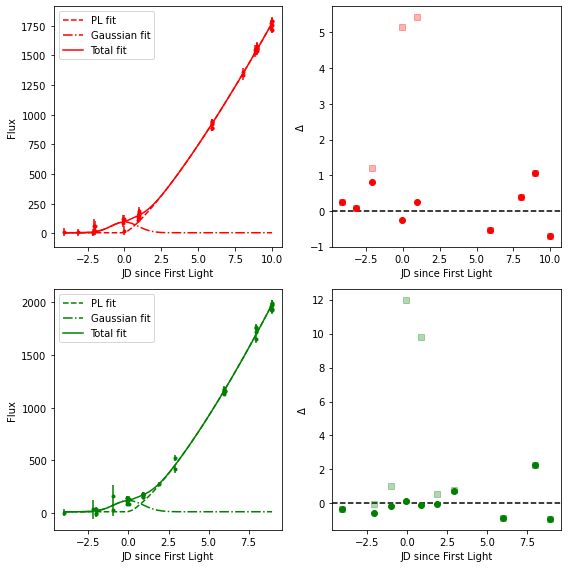

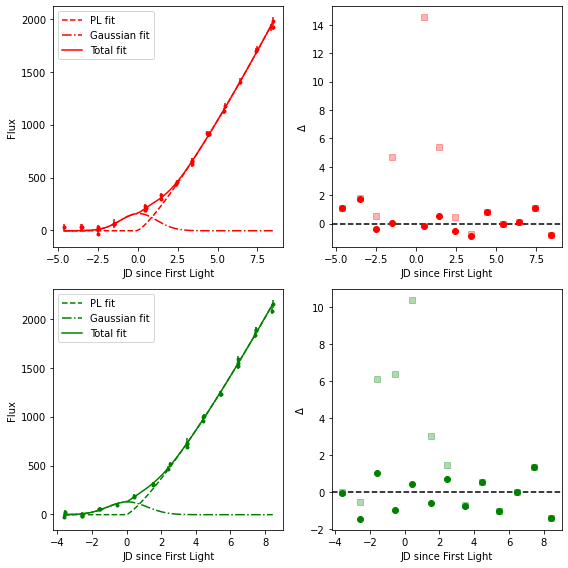

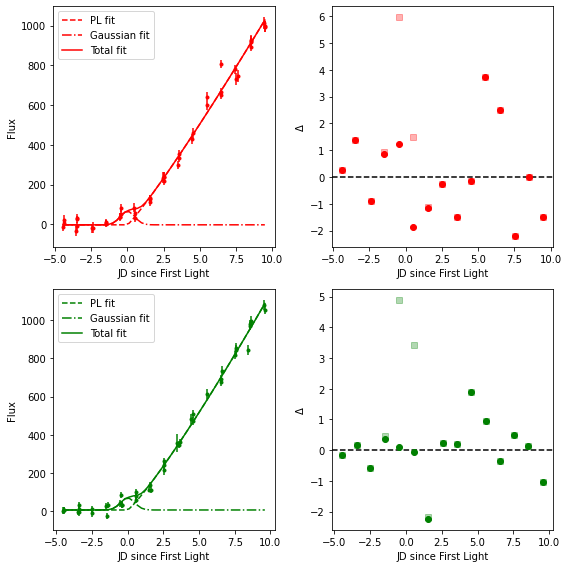

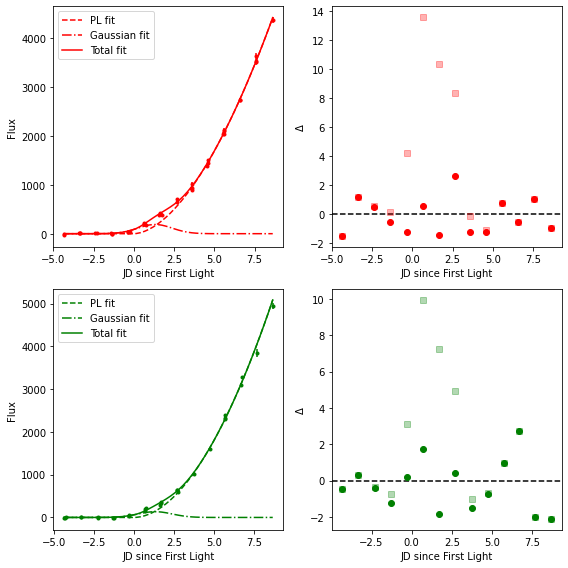

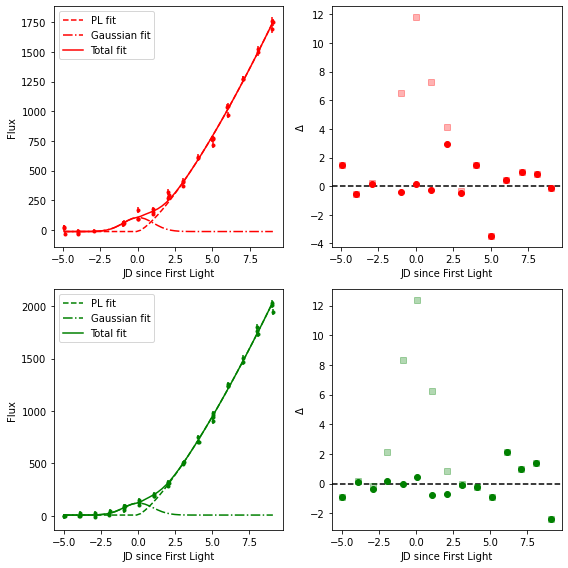

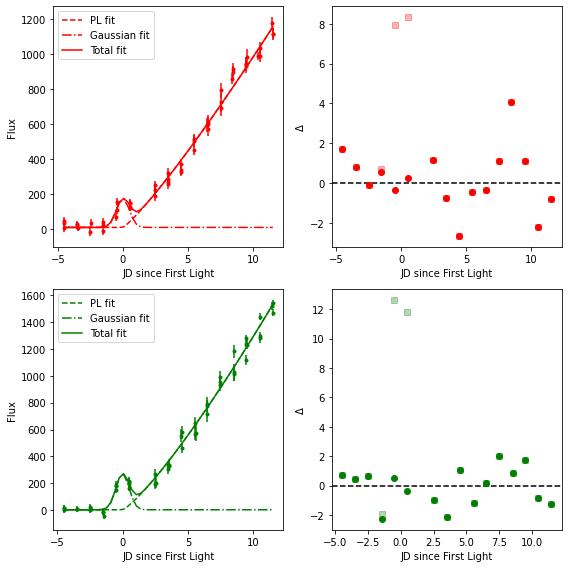

In [18]:
test.excess_search(verbose = False, save_path = './demo/')

In [19]:
test.gold = ['ZTF18aayjvve',  'ZTF18abcflnz',
           'ZTF18abucvbf', 'ZTF18abxxssh', ]

test.bronze = ['ZTF18aasdted', 'ZTF18abaxlpi', 'ZTF18abimsyv',
               'ZTF18abfgygp', 'ZTF18aaxsioa', 'ZTF18abssuxz', 'ZTF18abfhryc',
             'ZTF18aaslhxt', 'ZTF18aazsabq', 'ZTF18abauprj', ]

#test.bronze = ['ZTF18aasdted', 'ZTF18aaslhxt', 'ZTF18abauprj', 'ZTF18abaxlpi', 'ZTF18abfhryc']
test.excess = test.gold + test.bronze
test.nd = []
test.gold_nd = ['ZTF18aavrzxp', 'ZTF18aazblzy', 'ZTF18abcysdx', 'ZTF18abetehf', 'ZTF18abxygvv']

for i in test.sn_names:
    if i not in test.gold and i not in test.bronze:
        test.nd += [i]

In [525]:
test.N.loc['ZTF18aayjvve']['N'] = 8
test.N.loc['ZTF18abcflnz']['N'] = 9
test.N.loc['ZTF18abucvbf']['N'] = 8
test.N.loc['ZTF18abxxssh']['N'] = 10
test.N.loc['ZTF18aaslhxt']['N'] = 8
test.N.loc['ZTF18aasdted']['N'] = 8
test.N.loc['ZTF18aaxsioa']['N'] = 7
test.N.loc['ZTF18aazsabq']['N'] = 8
test.N.loc['ZTF18abaxlpi']['N'] = 9
test.N.loc['ZTF18abauprj']['N'] = 9
test.N.loc['ZTF18abimsyv']['N'] = 9
test.N.loc['ZTF18abfgygp']['N'] = 9
test.N.loc['ZTF18abfhryc']['N'] = 11
test.N.loc['ZTF18abssuxz']['N'] = 4

In [526]:
test.compute_bump_properties()

In [527]:
test.gauss_params

,t_exp,A_r,A_g,alpha_r,alpha_g,mu,sigma,C_r,C_g,B_r,...,dC_g,dB_r,dB_g,BIC,color,dcolor,fr,dfr,fg,dfg
SN,,,,,,,,,,,,,,,,,,,,,
ZTF18aayjvve,2458276.302019,145.201346,154.815508,1.221891,1.233572,0.07699,1.139086,462.037643,369.101692,-3.223314,...,77.202732,4.137162,4.304554,27.934704,0.243828,-0.224625,0.06695,0.012042,0.048822,0.010212
ZTF18abcflnz,2458288.208634,99.663342,87.134577,1.759872,1.882893,1.31529,1.057725,499.999976,357.873537,1.153185,...,78.538378,3.283544,3.094841,31.835426,0.363101,-0.13627,0.032886,0.005688,0.020294,0.004454
ZTF18abucvbf,2458368.15522,66.936368,77.717266,1.457929,1.456974,0.319661,0.991326,240.170743,230.24887,-14.850562,...,45.191746,3.594609,3.614466,36.426732,0.045806,-1.874588,0.050698,0.009215,0.041517,0.008149
ZTF18abxxssh,2458377.654313,18.105512,20.95375,1.679481,1.727656,1.488733,0.5,154.114438,275.922967,10.019476,...,56.439952,2.569059,2.646562,91.990776,-0.632361,0.059236,0.140441,0.043206,0.196367,0.040167
ZTF18aasdted,2458246.722334,157.82051,206.420492,1.805529,1.688311,1.487471,0.5,395.180479,278.33181,10.534386,...,201.173287,4.904711,5.976784,120.510316,0.380582,-0.023546,0.031231,0.018268,0.022055,0.015941
ZTF18abaxlpi,2458282.283263,77.891201,75.454359,1.159634,1.183053,0.0,0.5,85.716874,77.173369,-1.600928,...,20.684296,3.320449,2.91156,24.950060,0.113997,-0.779203,0.060884,0.01617,0.053209,0.014261
ZTF18abimsyv,2458315.266278,26.604359,14.812938,1.384101,1.707897,1.963947,1.365356,93.11949,163.603466,-5.374404,...,46.736827,2.145516,1.850285,-5.198395,-0.611880,0.160791,0.042588,0.029269,0.063296,0.018082
ZTF18abfgygp,2458306.598017,78.395707,106.950695,1.245647,1.161652,0.070412,1.313841,386.560538,357.927066,-3.732998,...,51.243884,1.929551,1.780406,2.305707,0.083557,-1.244237,0.085275,0.010222,0.069811,0.009995
ZTF18aaxsioa,2458269.557079,52.588912,44.08428,1.870764,1.947192,1.724656,0.50009,161.873329,0.0,11.372263,...,54.436666,4.621691,3.117232,-5.988307,93.250447,-0.000362,0.03297,0.012178,0.0,0.01113


In [41]:
test.fit_just_pl(cut = 10)

/Users/christineye/earlySN/earlySN/dataset.py:572: RuntimeWarning: invalid value encountered in sqrt
  var = np.sqrt(np.diagonal(cov))


In [42]:
pl_excess = test.pl_params.loc[test.nd].dropna()
dataset.avg_and_error(pl_excess['alpha_r'], pl_excess['dalpha_r'])

(1.5108266867971356, 0.028758644199130726)

Overall scatter:  0.15387197695360522


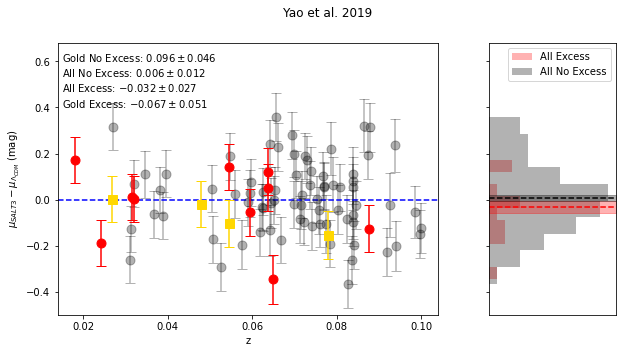

In [43]:
test.compare_excess()

1.4637517209643334 0.018732261145901027
1.4902062673935783 0.019432597633797746
$\alpha_g - \alpha_r = 0.02645454642924494 \pm 0.026991173713555233$


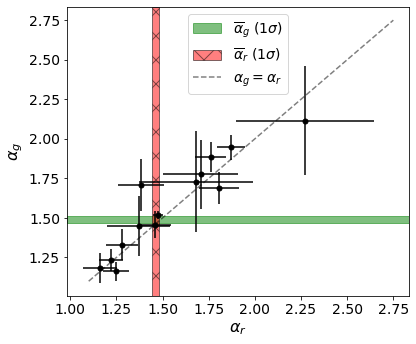

In [529]:
test.analyze_PL(subset = "excess")

Gold x1:  0.2279187158341502 0.37548737873899896
Excess x1:  -0.0009445804551212784 0.28176791330882694
No Excess x1:  -0.27470843539984374 0.12115483496912838
Gold c:  -0.024279226244832097 0.02552075805044343
Excess c:  -0.0017776582673452634 0.018902558602583486
No Excess c:  0.011112130301000023 0.010917914516081005


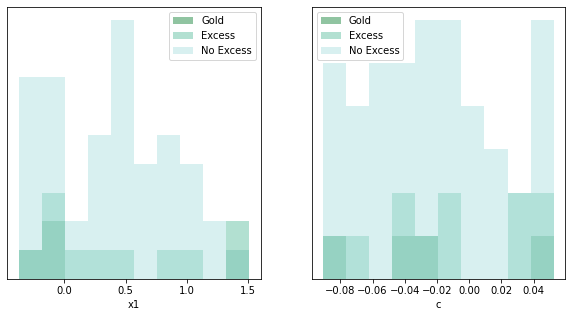

In [45]:
test.compare_fit_params()

In [ ]:
test.

9 {'r': 3, 'g': 2}


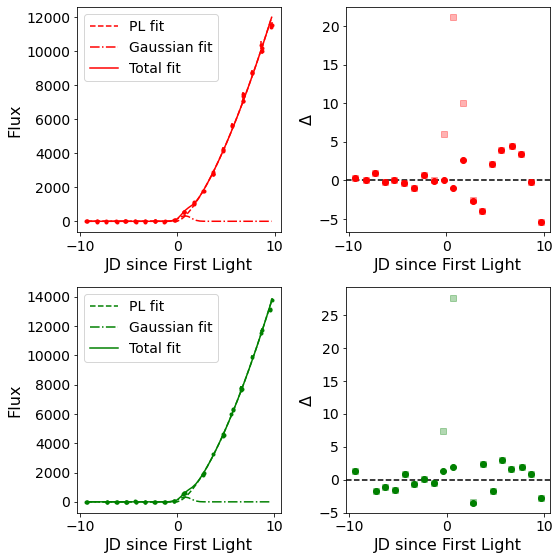

In [524]:
test.fit_single_sn('ZTF18abauprj', cut = 9)

r : 0.03594537785255554 0.0022566705273675564
g : 0.027864199021262137 0.0019974025373859696
$fr - fg = -0.008081178831293404 \pm 0.0030136653373334732$
$\log_{10}(G - R) = 93.21211081566264 \pm 0.00036227396917204945$


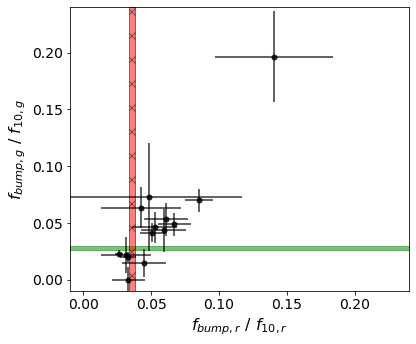

In [536]:
test.analyze_bump_amps()

In [ ]:
# deep dive into bronzes

In [475]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["figure.autolayout"] = True

r PearsonRResult(statistic=-0.06535179098207708, pvalue=0.8243434828631351)
g PearsonRResult(statistic=-0.1896680608195233, pvalue=0.5160513686896084)


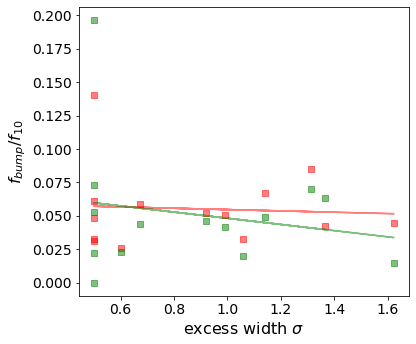

In [537]:
test.analyze_width_correlation(save_fig = './package/')

In [496]:
from scipy import stats
stats.median_abs_deviation(test.masses.dropna())[0]

0.5820645486597718

In [499]:
test.masses.median()[0]

9.954775081867284

gold:  median 9.426086436235984 MAD 0.322863492014533
all excess:  median 9.539424907452396 MAD 0.43523569334331746
all no excess:  median 10.080385349087308 MAD 0.514136564705626
gold no excess:  median 10.21828030932701 MAD 0.45413698602910024
Levene : LeveneResult(statistic=0.3913437953994129, pvalue=0.5332505153192723)
Bartlett : BartlettResult(statistic=0.20037185118504347, pvalue=0.6544208657443735)


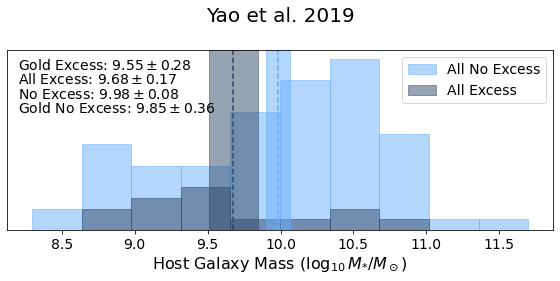

In [500]:
test.compare_mass()

In [515]:
test.make_paper_table()

aayjvve & 0.048 & 58292.3 & $17.655 \pm 0.005$ & $-0.18 \pm 0.03$ & $0.052 \pm 0.004$ & 27.934703983722784 & $0.07 \pm 0.01$ & $0.05 \pm 0.01$ & 8 \\
abcflnz & 0.027 & 58306.2 & $16.11 \pm 0.003$ & $-0.04 \pm 0.01$ & $-0.024 \pm 0.002$ & 31.8354257471824 & $0.033 \pm 0.006$ & $0.02 \pm 0.004$ & 9 \\
abucvbf & 0.054 & 58385.0 & $17.524 \pm 0.003$ & $-0.37 \pm 0.04$ & $-0.091 \pm 0.003$ & 36.426731847746396 & $0.051 \pm 0.009$ & $0.042 \pm 0.008$ & 8 \\
abxxssh & 0.078 & 58397.4 & $18.22 \pm 0.01$ & $1.5 \pm 0.1$ & $-0.035 \pm 0.007$ & 91.99077590615002 & $0.14 \pm 0.04$ & $0.2 \pm 0.04$ & 10 \\
aasdted & 0.018 & 58265.5 & $15.838 \pm 0.003$ & $0.83 \pm 0.01$ & $0.166 \pm 0.002$ & 120.51031551016581 & $0.03 \pm 0.02$ & $0.02 \pm 0.02$ & 8 \\
abaxlpi & 0.064 & 58298.5 & $18.394 \pm 0.005$ & $0.12 \pm 0.05$ & $0.047 \pm 0.004$ & 24.95006037136045 & $0.06 \pm 0.02$ & $0.05 \pm 0.01$ & 9 \\
abimsyv & 0.088 & 58334.5 & $18.54 \pm 0.006$ & $1.04 \pm 0.04$ & $-0.046 \pm 0.004$ & -5.198394559121